In [6]:
#all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns

%matplotlib inline

In [7]:
#Reading the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [8]:
train_df.head(5)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [9]:

train_df.shape

(70128, 6)

In [10]:
# checking for null values
train_df.isna().any()

row_id      False
date        False
country     False
store       False
product     False
num_sold    False
dtype: bool

In [11]:
#checking for unique values
train_df.nunique()

row_id      70128
date         1461
country         6
store           2
product         4
num_sold      699
dtype: int64

Preprocessing Step

In [12]:
def one_hot_encoding(df):
    cat_features = ["country","store","product","row_id"]
    dataframe =pd.merge(left=df,right=pd.get_dummies(train_df[cat_features]))
    dataframe = dataframe.drop(cat_features,axis=1)

    return dataframe

In [13]:
df = one_hot_encoding(train_df)
df

,date,num_sold,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
0,2017-01-01,663,1,0,0,0,0,0,1,0,1,0,0,0
1,2017-01-01,615,1,0,0,0,0,0,1,0,0,1,0,0
2,2017-01-01,480,1,0,0,0,0,0,1,0,0,0,1,0
3,2017-01-01,710,1,0,0,0,0,0,1,0,0,0,0,1
4,2017-01-01,240,1,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,2020-12-31,614,0,0,0,0,0,1,1,0,0,0,0,1
70124,2020-12-31,215,0,0,0,0,0,1,0,1,1,0,0,0
70125,2020-12-31,158,0,0,0,0,0,1,0,1,0,1,0,0
70126,2020-12-31,135,0,0,0,0,0,1,0,1,0,0,1,0


Visualizations and EDA

In [14]:
feature_df = train_df.groupby(['country','product','store']).sum()
feature_df.reset_index()
feature_df

row_id  num_sold
country product                          store                         
Belgium Kaggle Advanced Techniques       KaggleMart  51193440    593014
                                         KaggleRama  51199284    205826
        Kaggle Getting Started           KaggleMart  51194901    475774
                                         KaggleRama  51200745    165153
        Kaggle Recipe Book               KaggleMart  51196362    356371
                                         KaggleRama  51202206    123803
        Kaggle for Kids: One Smart Goose KaggleMart  51197823    638919
                                         KaggleRama  51203667    222190
France  Kaggle Advanced Techniques       KaggleMart  51205128    536155
                                         KaggleRama  51210972    186116
        Kaggle Getting Started           KaggleMart  51206589    429665
                                         KaggleRama  51212433    148831
        Kaggle Recipe Book               KaggleMart  51208050    321652
                                         KaggleRama  51213894    111312
        Kaggle for Kids: One Smart Goose KaggleMart  51209511    578045
                                         KaggleRama  51215355    200543
Germany Kaggle Advanced Techniques       KaggleMart  51216816    593793
                                         KaggleRama  51222660    206650
        Kaggle Getting Started           KaggleMart  51218277    475851
                                         KaggleRama  51224121    165485
        Kaggle Recipe Book               KaggleMart  51219738    357264
                                         KaggleRama  51225582    123788
        Kaggle for Kids: One Smart Goose KaggleMart  51221199    641419
                                         KaggleRama  51227043    222165
Italy   Kaggle Advanced Techniques       KaggleMart  51228504    470350
                                         KaggleRama  51234348    162675
        Kaggle Getting Started           KaggleMart  51229965    376232
                                         KaggleRama  51235809    130409
        Kaggle Recipe Book               KaggleMart  51231426    281614
                                         KaggleRama  51237270     97607
        Kaggle for Kids: One Smart Goose KaggleMart  51232887    506848
                                         KaggleRama  51238731    175357
Poland  Kaggle Advanced Techniques       KaggleMart  51240192    285576
                                         KaggleRama  51246036     98726
        Kaggle Getting Started           KaggleMart  51241653    228831
                                         KaggleRama  51247497     79342
        Kaggle Recipe Book               KaggleMart  51243114    171379
                                         KaggleRama  51248958     59258
        Kaggle for Kids: One Smart Goose KaggleMart  51244575    310811
                                         KaggleRama  51250419    107622
Spain   Kaggle Advanced Techniques       KaggleMart  51251880    426981
                                         KaggleRama  51257724    148048
        Kaggle Getting Started           KaggleMart  51253341    342798
                                         KaggleRama  51259185    118532
        Kaggle Recipe Book               KaggleMart  51254802    257082
                                         KaggleRama  51260646     88687
        Kaggle for Kids: One Smart Goose KaggleMart  51256263    460830
                                         KaggleRama  51262107    160280

In [15]:
px.bar(train_df.groupby('country')['num_sold'].sum())

In [16]:
px.bar(train_df.groupby('store')['num_sold'].sum())

In [42]:
px.bar(train_df.groupby('product')['num_sold'].sum())

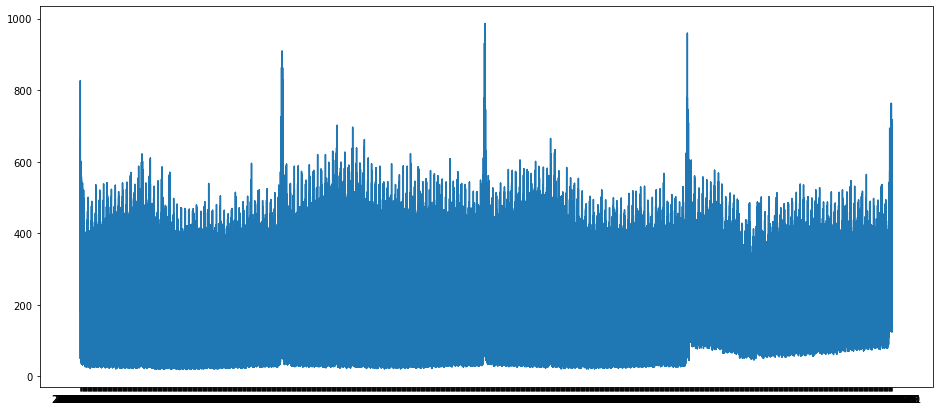

In [41]:
plt.figure(figsize=(16,7))
plt.plot(train_df['num_sold'])
plt.show()

<AxesSubplot:>

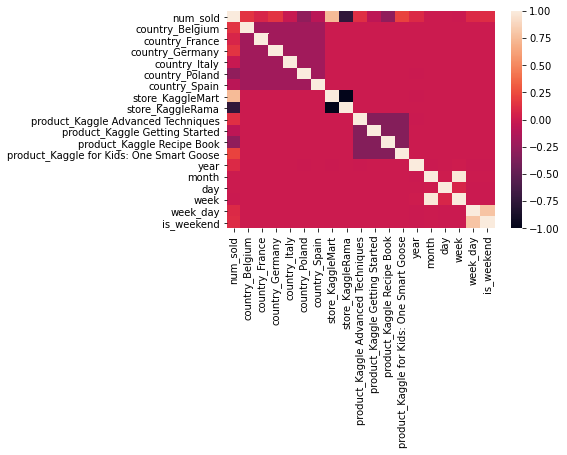

In [45]:
sns.heatmap(df.corr())


Feature Engineering

In [18]:
def new_features():
    
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['week'] = df['date'].dt.isocalendar().week
    df['week_day'] = df['date'].dt.weekday
    df['is_weekend'] = 0
    df['is_weekend'].loc[df['week_day']>4] = 1
    
    
    


In [19]:

df['date'] = pd.to_datetime(df["date"])

In [20]:
new_features()

c:\Users\sakshi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df.columns

Index(['num_sold', 'country_Belgium', 'country_France', 'country_Germany',
       'country_Italy', 'country_Poland', 'country_Spain', 'store_KaggleMart',
       'store_KaggleRama', 'product_Kaggle Advanced Techniques',
       'product_Kaggle Getting Started', 'product_Kaggle Recipe Book',
       'product_Kaggle for Kids: One Smart Goose', 'year', 'month', 'day',
       'week', 'week_day', 'is_weekend'],
      dtype='object')

In [22]:
df_num = df.groupby(['year']).mean()


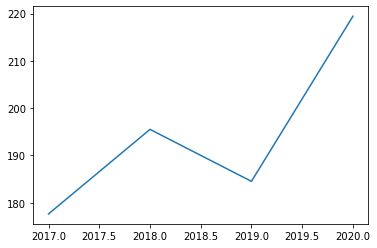

In [23]:
plt.plot(df_num['num_sold'])

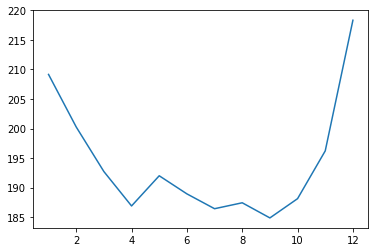

In [24]:

df1 = df.groupby(['month']).mean()
plt.plot(df1['num_sold'])
plt.show()

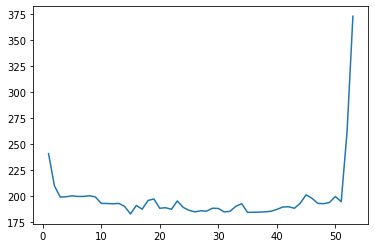

In [25]:
df2 = df.groupby(['week']).mean()
plt.plot(df2['num_sold'])
plt.show()

In [26]:
train_df.set_index('date', inplace=True)
train_df.sort_index(inplace=True)
train_df

,row_id,country,store,product,num_sold
date,,,,,
2017-01-01,0,Belgium,KaggleMart,Kaggle Advanced Techniques,663
2017-01-01,1,Belgium,KaggleMart,Kaggle Getting Started,615
2017-01-01,2,Belgium,KaggleMart,Kaggle Recipe Book,480
2017-01-01,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
2017-01-01,4,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...
2020-12-31,70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
2020-12-31,70124,Spain,KaggleRama,Kaggle Advanced Techniques,215
2020-12-31,70125,Spain,KaggleRama,Kaggle Getting Started,158


In [27]:
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df

,num_sold,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,year,month,day,week,week_day,is_weekend
date,,,,,,,,,,,,,,,,,,,
2017-01-01,663,1,0,0,0,0,0,1,0,1,0,0,0,2017,1,1,52,6,1
2017-01-01,615,1,0,0,0,0,0,1,0,0,1,0,0,2017,1,1,52,6,1
2017-01-01,480,1,0,0,0,0,0,1,0,0,0,1,0,2017,1,1,52,6,1
2017-01-01,710,1,0,0,0,0,0,1,0,0,0,0,1,2017,1,1,52,6,1
2017-01-01,240,1,0,0,0,0,0,0,1,1,0,0,0,2017,1,1,52,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,614,0,0,0,0,0,1,1,0,0,0,0,1,2020,12,31,53,3,0
2020-12-31,215,0,0,0,0,0,1,0,1,1,0,0,0,2020,12,31,53,3,0
2020-12-31,158,0,0,0,0,0,1,0,1,0,1,0,0,2020,12,31,53,3,0


In [50]:
df

,num_sold,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose,year,month,day,week,week_day,is_weekend
date,,,,,,,,,,,,,,,,,,,
2017-01-01,663,1,0,0,0,0,0,1,0,1,0,0,0,2017,1,1,52,6,1
2017-01-01,615,1,0,0,0,0,0,1,0,0,1,0,0,2017,1,1,52,6,1
2017-01-01,480,1,0,0,0,0,0,1,0,0,0,1,0,2017,1,1,52,6,1
2017-01-01,710,1,0,0,0,0,0,1,0,0,0,0,1,2017,1,1,52,6,1
2017-01-01,240,1,0,0,0,0,0,0,1,1,0,0,0,2017,1,1,52,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,614,0,0,0,0,0,1,1,0,0,0,0,1,2020,12,31,53,3,0
2020-12-31,215,0,0,0,0,0,1,0,1,1,0,0,0,2020,12,31,53,3,0
2020-12-31,158,0,0,0,0,0,1,0,1,0,1,0,0,2020,12,31,53,3,0


In [28]:
X = df.drop(columns=['num_sold'],axis=1)

y = df['num_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test,y_test))
y1 = lr.predict(X_test)



lasso = LassoCV(n_alphas=200)
lasso.fit(X_train, y_train)
print(lasso.score(X_test,y_test))
y_lasso = lasso.predict(X_test)

ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)
y_ridge = ridge.predict(X_test)


dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))
y_predict = dt.predict(X_test)




0.7975466550907822
0.7975017066387462
0.9743630203925651


In [30]:
param = {
    
    'fit_intercept':[True, False],
    'normalize':[True, False]
}
grid_clf = GridSearchCV(ridge,param_grid=param,scoring='neg_mean_absolute_error')
clg_grid = grid_clf.fit(X_train,y_train)

In [31]:
ridge.get_params().keys()

dict_keys(['alpha_per_target', 'alphas', 'cv', 'fit_intercept', 'gcv_mode', 'normalize', 'scoring', 'store_cv_values'])

In [49]:
#metrics for Decision tree
print("Cross val score for Decision tree",cross_val_score(dt,X,y,cv=5))
print("MAE",mean_absolute_error(y_test,y_predict))
print("MSE",mean_squared_error(y_test,y_predict))
print("RMSE",mean_squared_error(y_test,y_predict,squared=False))

Cross val score for Decision tree [0.9289617  0.94603702 0.96761441 0.94647446 0.8631245 ]
MAE 13.098431491163634
MSE 407.1595298794452
RMSE 20.178194415741096


In [46]:
#Metrics for Linear regression
print("Cross",cross_val_score(lr,X,y,cv=5))
print("MAE",mean_absolute_error(y_test,y1))
print("MSE",mean_squared_error(y_test,y1))
print("RMSE",mean_squared_error(y_test,y1,squared=False))

Cross [0.80690503 0.80008821 0.80495615 0.76892175 0.63433175]
MAE 42.24015498189323
MSE 3215.3089013595277
RMSE 56.70369389519106


In [47]:
#Metrics for Lasso
print("Cross",cross_val_score(lasso,X,y,cv=5))
print("MAE",mean_absolute_error(y_test,y_lasso))
print("MSE",mean_squared_error(y_test,y_lasso))
print("RMSE",mean_squared_error(y_test,y_lasso,squared=False))

Cross [0.80711078 0.79874253 0.79851533 0.76937548 0.63662135]
MAE 42.20522644838368
MSE 3216.0227604365346
RMSE 56.709988189352806


In [48]:
#metrics for Ridge
print("Cross",cross_val_score(ridge,X,y,cv=5))
print("MAE",mean_absolute_error(y_test,y_ridge))
print("MSE",mean_squared_error(y_test,y_ridge))
print("RMSE",mean_squared_error(y_test,y_ridge,squared=False))

Cross [0.80723805 0.80007192 0.80494389 0.76892584 0.6343608 ]
MAE 42.239071554550186
MSE 3215.3185734558433
RMSE 56.70377918142532


In [36]:
from statsmodels.tsa.arima.model import ARIMA
series = pd.DataFrame()
series['values'] = df['num_sold']
model = ARIMA(df['num_sold'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())


c:\Users\sakshi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\sakshi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\sakshi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:               num_sold   No. Observations:                70128
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -434000.979
Date:                Wed, 14 Dec 2022   AIC                         868013.958
Time:                        22:55:45   BIC                         868068.906
Sample:                             0   HQIC                        868030.904
                              - 70128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4618      0.004   -106.388      0.000      -0.470      -0.453
ar.L2         -0.3015      0.004    -70.257      0.000      -0.310      -0.293
ar.L3         -0.1796      0.004    -43.764      0.0

<AxesSubplot:xlabel='date'>

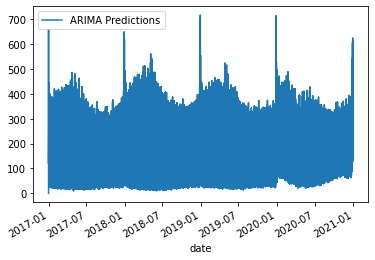

In [37]:
start = len(X_train)
end = len(X_train)+len(X_test)-1
pred=model_fit.predict(typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)

In [38]:
pred

date
2017-01-01      0.000000
2017-01-01    658.438292
2017-01-01    628.208964
2017-01-01    544.508146
2017-01-01    639.422095
                 ...    
2020-12-31    356.149363
2020-12-31    355.540670
2020-12-31    324.865860
2020-12-31    321.511577
2020-12-31    128.174524
Name: ARIMA Predictions, Length: 70128, dtype: float64

In [39]:
y_test

date
2018-11-02     91
2019-05-11    162
2020-04-22    107
2017-10-28    374
2017-06-28     71
             ... 
2017-10-02     76
2018-12-08    152
2020-09-23    291
2017-12-06    272
2017-11-16     52
Name: num_sold, Length: 23143, dtype: int64

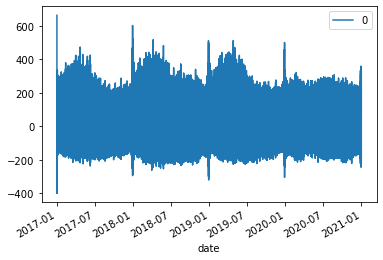

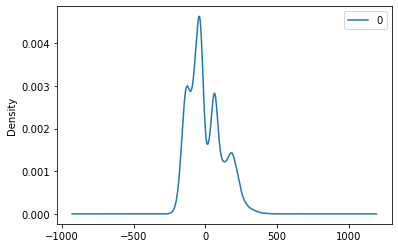

                  0
count  70128.000000
mean      -0.003836
std      117.929836
min     -399.422095
25%      -88.479912
50%      -28.707323
75%       75.925540
max      663.000000


In [40]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print (residuals.describe())